<a href="https://colab.research.google.com/github/shritigupta/EVA/blob/master/S9/S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [2]:
import torch
import torchvision
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
#!pip install torchsummary
from torchsummary import summary
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm
!pip install -U git+https://github.com/albu/albumentations > /dev/null






  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-hm9wnmis


In [3]:
drive.flush_and_unmount()
drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/My\ Drive/ass_util/

Drive not mounted, so nothing to flush and unmount.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/ass_util


In [0]:

from Albumentation import AlbumentationTransforms
import train_acc_loss as tr 
import test_acc_loss as ts
import resnet

In [0]:

#transform = my_transform.transform
import albumentations as A
import albumentations.pytorch as AP


# Train Phase transformations
train_transforms = AlbumentationTransforms([
                                       A.Rotate((-30.0, 30.0)),
                                       A.HorizontalFlip(),
                                       A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
                                       A.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                                       A.Cutout(num_holes=4), # fillvalue is 0 after normalizing as mean is 0
                                       AP.ToTensor()
                                       ])

test_transforms = AlbumentationTransforms([
    A.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    AP.ToTensor()
    ])

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:

from torchvision import datasets
import dataloaders
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)


dataloader = dataloaders.DataLoader(batch_size=128)

# train dataloader
trainloader = dataloader.load(train)

# test dataloader
testloader = dataloader.load(test)



Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([128, 3, 32, 32])
torch.Size([128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

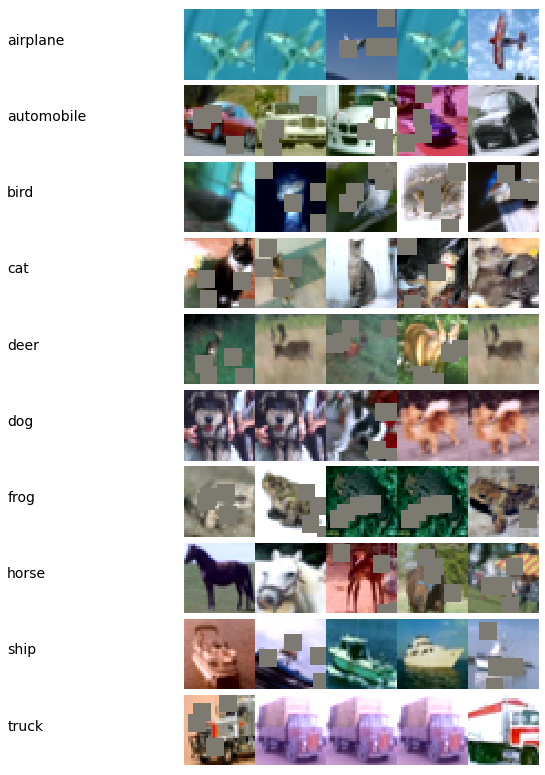

In [7]:
from __future__ import print_function
channel_means = (0.49139968, 0.48215841, 0.44653091)
channel_stdevs = (0.24703223, 0.24348513, 0.26158784)

def unnormalize(img):
  img = img.numpy().astype(dtype=np.float32)
  
  for i in range(img.shape[0]):
    img[i] = (img[i]*channel_stdevs[i])+channel_means[i]
  
  return np.transpose(img, (1,2,0))

%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = 10
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
r, c = 10, 11
n = 5
fig = plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for i in range(num_classes):
    idx = np.random.choice(np.where(labels[:]==i)[0], n)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, n+1):
      plt.subplot(r, c, i*c+j+1)
      plt.imshow(unnormalize(images[idx[j-1]]), interpolation='none')
      plt.axis('off')
plt.show()


In [8]:
from torchsummary import summary
import models
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print (device)
net = models.ResNet18().to(device)
net.device = torch.device("cuda" if use_cuda else "cpu")
net.to(net.device)
net.summary((3,32,32)) 



cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [10]:
from tqdm import tqdm
import train_acc_loss as tr 
import test_acc_loss as ts
import my_transform
import torch.optim as optim
import torch.nn as nn

learning_rate = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

test_acc = []
train_acc = []
for epoch in range(1, 30):
        learning_rate = my_transform.adjust_learning_rate(learning_rate, epoch)
        epoch_train_acc,epoch_train_loss = tr.train(net, device, trainloader, optimizer, criterion)        
        epoch_test_acc,epoch_test_loss = ts.test(net, device, testloader,criterion )

        print('\nEpoch: {:.0f} Train set: Average loss: {:.4f}, Accuracy: {:.3f}%'.format(epoch, epoch_train_loss, epoch_train_acc))
        print('Epoch: {:.0f} Test set: Average loss: {:.4f}, Accuracy: {:.3f}%'.format(epoch, epoch_test_loss, epoch_test_acc))

  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 1 Train set: Average loss: 0.0119, Accuracy: 44.846%
Epoch: 1 Test set: Average loss: 1.2828, Accuracy: 54.310%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 2 Train set: Average loss: 0.0101, Accuracy: 54.114%
Epoch: 2 Test set: Average loss: 1.0904, Accuracy: 62.220%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 3 Train set: Average loss: 0.0089, Accuracy: 60.076%
Epoch: 3 Test set: Average loss: 1.0156, Accuracy: 65.650%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 4 Train set: Average loss: 0.0079, Accuracy: 64.460%
Epoch: 4 Test set: Average loss: 0.8782, Accuracy: 69.270%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 5 Train set: Average loss: 0.0070, Accuracy: 68.538%
Epoch: 5 Test set: Average loss: 0.7991, Accuracy: 73.400%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 6 Train set: Average loss: 0.0063, Accuracy: 71.702%
Epoch: 6 Test set: Average loss: 0.6902, Accuracy: 76.680%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 7 Train set: Average loss: 0.0058, Accuracy: 74.144%
Epoch: 7 Test set: Average loss: 0.6571, Accuracy: 77.800%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 8 Train set: Average loss: 0.0053, Accuracy: 76.352%
Epoch: 8 Test set: Average loss: 0.5868, Accuracy: 80.240%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 9 Train set: Average loss: 0.0050, Accuracy: 78.084%
Epoch: 9 Test set: Average loss: 0.5400, Accuracy: 81.750%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 10 Train set: Average loss: 0.0046, Accuracy: 79.616%
Epoch: 10 Test set: Average loss: 0.5132, Accuracy: 82.450%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 11 Train set: Average loss: 0.0043, Accuracy: 80.752%
Epoch: 11 Test set: Average loss: 0.4997, Accuracy: 82.840%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 12 Train set: Average loss: 0.0041, Accuracy: 81.838%
Epoch: 12 Test set: Average loss: 0.4703, Accuracy: 84.040%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 13 Train set: Average loss: 0.0039, Accuracy: 82.468%
Epoch: 13 Test set: Average loss: 0.4574, Accuracy: 84.370%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 14 Train set: Average loss: 0.0037, Accuracy: 83.662%
Epoch: 14 Test set: Average loss: 0.4536, Accuracy: 85.000%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 15 Train set: Average loss: 0.0034, Accuracy: 84.682%
Epoch: 15 Test set: Average loss: 0.5055, Accuracy: 83.140%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 16 Train set: Average loss: 0.0033, Accuracy: 85.380%
Epoch: 16 Test set: Average loss: 0.4403, Accuracy: 85.740%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 17 Train set: Average loss: 0.0031, Accuracy: 85.838%
Epoch: 17 Test set: Average loss: 0.4281, Accuracy: 85.960%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 18 Train set: Average loss: 0.0030, Accuracy: 86.820%
Epoch: 18 Test set: Average loss: 0.4172, Accuracy: 86.550%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 19 Train set: Average loss: 0.0029, Accuracy: 87.254%
Epoch: 19 Test set: Average loss: 0.3930, Accuracy: 87.330%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 20 Train set: Average loss: 0.0027, Accuracy: 87.834%
Epoch: 20 Test set: Average loss: 0.4188, Accuracy: 86.830%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 21 Train set: Average loss: 0.0026, Accuracy: 88.406%
Epoch: 21 Test set: Average loss: 0.4386, Accuracy: 85.980%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 22 Train set: Average loss: 0.0025, Accuracy: 88.868%
Epoch: 22 Test set: Average loss: 0.4106, Accuracy: 87.170%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 23 Train set: Average loss: 0.0024, Accuracy: 89.322%
Epoch: 23 Test set: Average loss: 0.3723, Accuracy: 88.450%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 24 Train set: Average loss: 0.0023, Accuracy: 89.734%
Epoch: 24 Test set: Average loss: 0.3700, Accuracy: 88.430%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 25 Train set: Average loss: 0.0022, Accuracy: 90.128%
Epoch: 25 Test set: Average loss: 0.4087, Accuracy: 87.450%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 26 Train set: Average loss: 0.0021, Accuracy: 90.500%
Epoch: 26 Test set: Average loss: 0.4228, Accuracy: 87.700%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 27 Train set: Average loss: 0.0020, Accuracy: 90.984%
Epoch: 27 Test set: Average loss: 0.4017, Accuracy: 88.170%


  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 28 Train set: Average loss: 0.0019, Accuracy: 91.356%
Epoch: 28 Test set: Average loss: 0.4003, Accuracy: 88.240%


100%|██████████| 391/391 [00:56<00:00,  6.97it/s]



Epoch: 29 Train set: Average loss: 0.0019, Accuracy: 91.634%
Epoch: 29 Test set: Average loss: 0.4276, Accuracy: 87.820%


4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


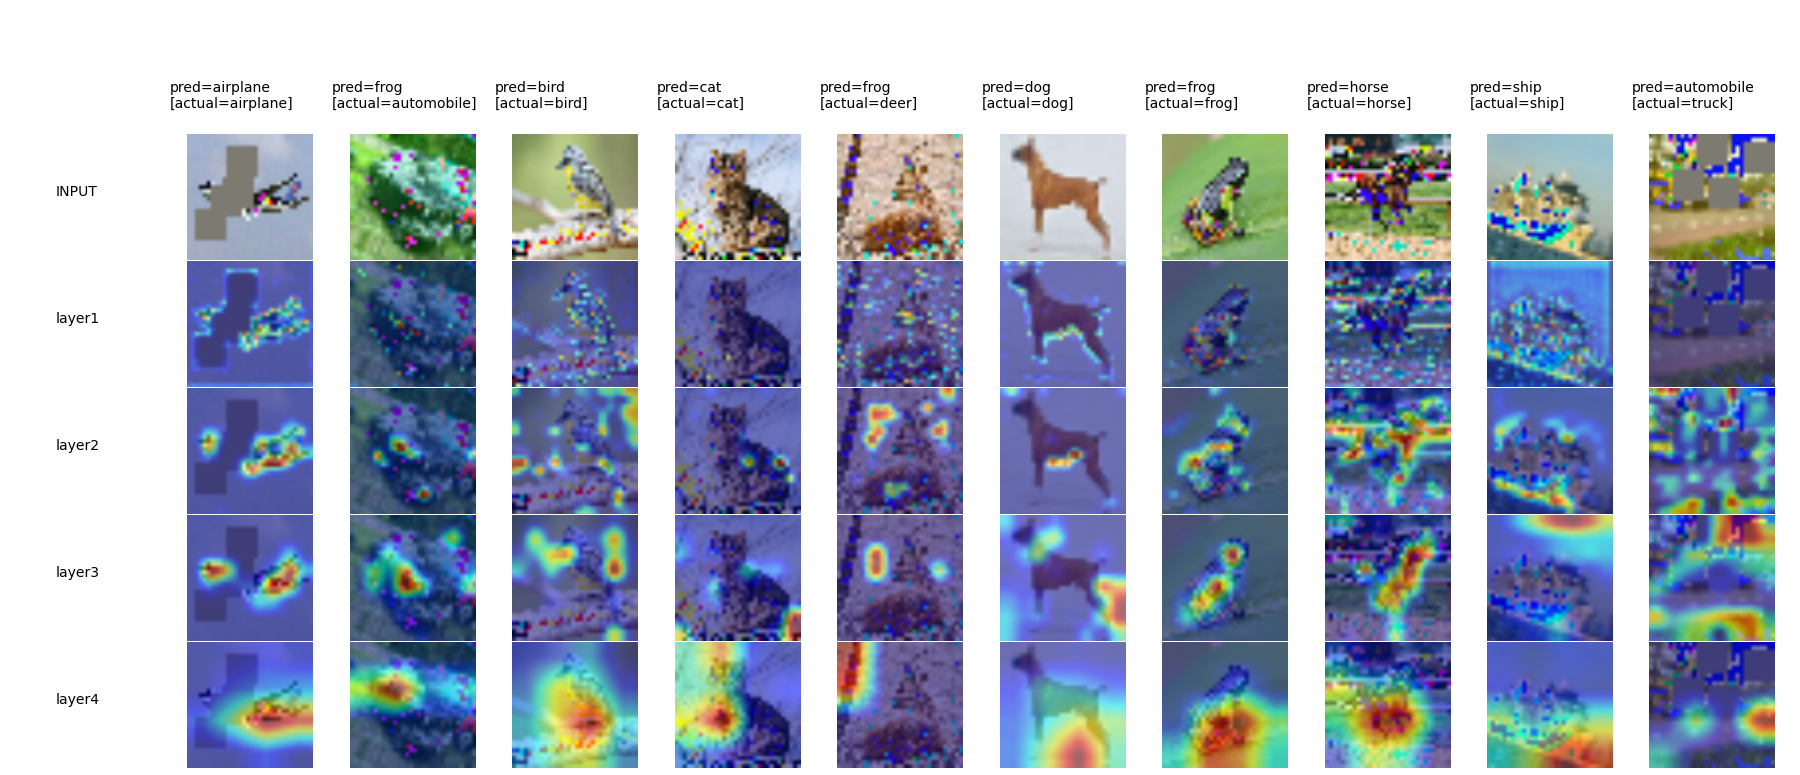

In [15]:
import cv2
import urllib
import numpy as np
from google.colab.patches import cv2_imshow

def getimage(img, transform, input_size=(32,32)):
  if img.startswith("http"):
      req = urllib.request.urlopen(img)
      arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
      img = cv2.imdecode(arr, -1) # 'Load it as it is'
  else:
    img = cv2.imread(img, 1)
  
  img = img[:,:, -1::-1]
  
  img = np.uint8(cv2.resize(img, input_size))

  return transform(img)
in_images = [
          (0, 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/Egyptair.a330-200.su-gce.arp.jpg/1200px-Egyptair.a330-200.su-gce.arp.jpg'),
          (1, 'https://upload.wikimedia.org/wikipedia/commons/5/5b/Riley_4-68_Riviera_1961.jpg'),
          (2, 'https://upload.wikimedia.org/wikipedia/commons/4/45/Eopsaltria_australis_-_Mogo_Campground.jpg'),
          (3, 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/800px-Cat_November_2010-1a.jpg'),
          (4, 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Spotted_deer_in_S.V._zoo%2C_Tirupathi_%28May_2019%29.jpg/1920px-Spotted_deer_in_S.V._zoo%2C_Tirupathi_%28May_2019%29.jpg'),
          (5, 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/%22Boxer_dog%22_stand.jpg/1280px-%22Boxer_dog%22_stand.jpg'),
          (6, 'https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Variegated_golden_frog_%28Mantella_baroni%29_Ranomafana.jpg/800px-Variegated_golden_frog_%28Mantella_baroni%29_Ranomafana.jpg'),
          (7, 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/Horseracing_Churchill_Downs.jpg/1920px-Horseracing_Churchill_Downs.jpg'),
          (8, 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Marina_%28ship%2C_2011%29%2C_S%C3%A8te_01.jpg/1920px-Marina_%28ship%2C_2011%29%2C_S%C3%A8te_01.jpg'),
          (9, 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Bergingstruck_%28tow_truck%29.jpg/1280px-Bergingstruck_%28tow_truck%29.jpg')
]

images = []
target_classes = []

for i in in_images:
  images.append(getimage(i[1], train_transforms))
  target_classes.append(i[0])


from GradCam import GRADCAM, PLOT
target_layers = ["layer1", "layer2", "layer3", "layer4"]
gradcam_output, probs, predicted_classes = GRADCAM(images, target_classes, net, target_layers)
PLOT(gradcam_output, images, target_classes, target_layers, class_names, (3, 32, 32), predicted_classes, unnormalize)

